<a href="https://colab.research.google.com/github/Pyeon-Joung-Wook/Natural-Language-Processing/blob/main/Coupang_Employee_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
from time import sleep
import re
from wordcloud import WordCloud, STOPWORDS
import nltk  
from nltk.corpus import stopwords
import platform
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     |████████████████████████████████| 19.4 MB 8.3 MB/s 
     |████████████████████████████████| 448 kB 59.7 MB/s 
     |████████████████████████████████| 86 kB 8.1 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-08-06 16:02:36--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00

In [3]:
from konlpy.tag import Mecab

In [4]:
# 탐색
search_object = 'companies'
corp_code = '87444'
search_type = 'reviews'
seed = '%EC%BF%A0%ED%8C%A1'

target_url = 'https://www.jobplanet.co.kr/'+search_object+'/'+corp_code+'/'+search_type+'/'+seed
start_page = 1
end_page = 315
params = {
        'page' : start_page
        }

In [5]:
resp = requests.get(target_url, params=params)
resp

<Response [200]>

In [6]:
# resp.encoding
# resp.headers
resp.url

'https://www.jobplanet.co.kr/companies/87444/reviews/%EC%BF%A0%ED%8C%A1?page=1'

In [7]:
soup = BeautifulSoup(resp.content)
print(soup.get_text()[:60])




쿠팡(주) 2021년 하반기 채용 | 3,282건 기업리뷰, 3.1 리뷰평점 | 잡플래닛










In [8]:
# 내용확인
page_list = soup.find_all('meta', property_ = '')
page_list

[<meta content="width=1182" name="viewport"/>,
 <meta content="쿠팡(주) 2021년 하반기 채용 | 3,282건 기업리뷰, 3.1 리뷰평점 | 잡플래닛" name="title"/>,
 <meta content="쿠팡(주) 3,282건 기업리뷰, 대기업 채용, 중소기업 채용, 1000대기업, 취업사이트, 상반기채용, 하반기채용, 합격자소서, 면접예상질문, 연봉순위, 잡플래닛리뷰, 취업준비생, 채용정보, 채용공고, 공채, 구인구직사이트" name="keywords"/>,
 <meta content="쿠팡(주) 기업정보 - 장단점 키워드: 구성원, 일용직, 제때 | 기업리뷰: 자유로운 분위기 같으면서도 아닌 것 같은 묘하게 이상한 곳. 업무강도는 있는 편이지만 그래도 팀원 잘 만나면 버틸 수 있는 곳 같음 | 쿠팡(주)의 관련 뉴스, 기업리뷰와 생생한 면접후기를 통하여 원하시는 기업에 대한 정보를 미리 체험하세요!" name="description"/>,
 <meta content="쿠팡(주) 기업정보 - 장단점 키워드: 구성원, 일용직, 제때 | 기업리뷰: 자유로운 분위기 같으면서도 아닌 것 같은 묘하게 이상한 곳. 업무강도는 있는 편이지만 그래도 팀원 잘 만나면 버틸 수 있는 곳 같음 | 쿠팡(주)의 관련 뉴스, 기업리뷰와 생생한 면접후기를 통하여 원하시는 기업에 대한 정보를 미리 체험하세요!" property="description"/>,
 <meta content="text/html; charset=utf-8" http-equiv="content-type"/>,
 <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>,
 <meta content="C6731F07D45F619A26195CF4D3182432" name="msvalidate.01"/>,
 <meta content="3710bb9e5207d0fb4b19e0ee5db5a23089eed600"

In [9]:
# 12번째 위치에 장단점 내용이 들어있음을 확인
page_list[12]

<meta content="미래지향적이고 젊은 마인드의 회사
때로는 거침없으며 인간적으로도 괜찮은 회사라고 생각됨 (장점) 일반적인 조직 문화의 한국 회사와 다르게 개방적이며
의사결정이 굉장히 빠르게 진행되며 진취적 (단점) 전체적으로 문화수준이나 기술력 레벨이 높다고 판단됩니다
초년생이나 경험이 부족하신 분에게는 일의 허들이 높다고 판단됩니다" property="og:description"/>

In [10]:
page_list[12]['content']

'미래지향적이고 젊은 마인드의 회사\r\n때로는 거침없으며 인간적으로도 괜찮은 회사라고 생각됨 (장점) 일반적인 조직 문화의 한국 회사와 다르게 개방적이며\r\n의사결정이 굉장히 빠르게 진행되며 진취적 (단점) 전체적으로 문화수준이나 기술력 레벨이 높다고 판단됩니다\r\n초년생이나 경험이 부족하신 분에게는 일의 허들이 높다고 판단됩니다'

In [11]:
def Get_Coupang_Sentiment(start_page, end_page): 
    
    good = []
    bad = []

    for i in tqdm(range(start_page, end_page)) : 
        sleep(0.1)
        search_object = 'companies'
        corp_code = '87444'
        search_type = 'reviews'
        seed = '%EC%BF%A0%ED%8C%A1'
        target_url = 'https://www.jobplanet.co.kr/'+search_object+'/'+corp_code+'/'+search_type+'/'+seed
        params = {'page' : i}
        resp = requests.get(target_url, params=params)
        soup = BeautifulSoup(resp.content)
        page_list = soup.find_all('meta', property_ = '')
        page_list
        review = page_list[12]['content'].split("(장점)")
        review = review[1].split("(단점)")
        good.append(review[0])
        bad.append(review[1])
        
    return good, bad

In [12]:
raw_good, raw_bad = Get_Coupang_Sentiment(start_page, end_page)

100%|██████████| 314/314 [12:55<00:00,  2.47s/it]


In [13]:
raw_good[:5]

[' 일반적인 조직 문화의 한국 회사와 다르게 개방적이며\r\n의사결정이 굉장히 빠르게 진행되며 진취적 ',
 ' 연차 자유롭게 사용 가능\n자유로운 분위기\n심각한 꼰대는 없는 듯 ',
 ' 연차가 자유롭습니다 근무형태에 따라 다르겟지만 근무시간을 잘지키는 부서도 있습니다 ',
 ' 연차 자유롭게 쓸수 있음, 1년에 1,2번 쿠팡캐쉬를 지급함, 건강검진을 좀 더 자세히 받을 수 있음, 스마트러닝 및 이북 서비스도 가끔씩 제공, 사이버대학교 지원시 입학금 일부 면제해택 ',
 ' 연차사용 자유로우며 자유로운 분위기 속 근무가능 쾌적한 환경 및 혁신 ']

In [17]:
def cleanr(content_list):
    
    clean_list = []
    
    for content in content_list:
        
        cleanr1 = re.compile('<.*?>')
        cleantext = re.sub(cleanr1, '', content)
        
        cleanr2 = re.compile('[\n]|[\r]|[\']')
        cleantext = re.sub(cleanr2, '', cleantext)
        
        clean_list.append(cleantext)
        
    return clean_list

In [18]:
good = cleanr(raw_good)
bad = cleanr(raw_bad)

good[:5]

[' 일반적인 조직 문화의 한국 회사와 다르게 개방적이며의사결정이 굉장히 빠르게 진행되며 진취적 ',
 ' 연차 자유롭게 사용 가능자유로운 분위기심각한 꼰대는 없는 듯 ',
 ' 연차가 자유롭습니다 근무형태에 따라 다르겟지만 근무시간을 잘지키는 부서도 있습니다 ',
 ' 연차 자유롭게 쓸수 있음, 1년에 1,2번 쿠팡캐쉬를 지급함, 건강검진을 좀 더 자세히 받을 수 있음, 스마트러닝 및 이북 서비스도 가끔씩 제공, 사이버대학교 지원시 입학금 일부 면제해택 ',
 ' 연차사용 자유로우며 자유로운 분위기 속 근무가능 쾌적한 환경 및 혁신 ']

In [19]:
coupang_good = ''
coupang_bad = ''

for i,j in zip(good, bad) : 
    coupang_good += i
    coupang_bad += j

coupang_good[:300]

' 일반적인 조직 문화의 한국 회사와 다르게 개방적이며의사결정이 굉장히 빠르게 진행되며 진취적  연차 자유롭게 사용 가능자유로운 분위기심각한 꼰대는 없는 듯  연차가 자유롭습니다 근무형태에 따라 다르겟지만 근무시간을 잘지키는 부서도 있습니다  연차 자유롭게 쓸수 있음, 1년에 1,2번 쿠팡캐쉬를 지급함, 건강검진을 좀 더 자세히 받을 수 있음, 스마트러닝 및 이북 서비스도 가끔씩 제공, 사이버대학교 지원시 입학금 일부 면제해택  연차사용 자유로우며 자유로운 분위기 속 근무가능 쾌적한 환경 및 혁신  연차 자유롭게 쓸 수 있음 / 중간'

In [37]:
path = "./BMDOHYEON_ttf.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Error')

Error


In [43]:
import platform
import matplotlib.pyplot as plt

%matplotlib inline


path = "/content/Mecab-ko-for-Google-Colab/BMDOHYEON_ttf.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

Unknown system... sorry~~~~


In [21]:
import wordcloud
import sys
flags = (re.UNICODE if sys.version < '3' and type(text) is unicode  # noqa: F821
                 else 0)

In [27]:
m = Mecab()
coupang_bad_word = m.nouns(coupang_bad)
coupang_good_word = m.nouns(coupang_good)

In [31]:
coupang_bad_str = ",".join(coupang_bad_word)
coupang_good_str = ",".join(coupang_good_word)

In [23]:
from wordcloud import get_single_color_func

class SimpleGroupedColorFunc(object):
    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)

class GroupedColorFunc(object):
    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

In [48]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(font_path='./BMDOHYEON_ttf.ttf', background_color='white').generate(coupang_good_str)

In [49]:
import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

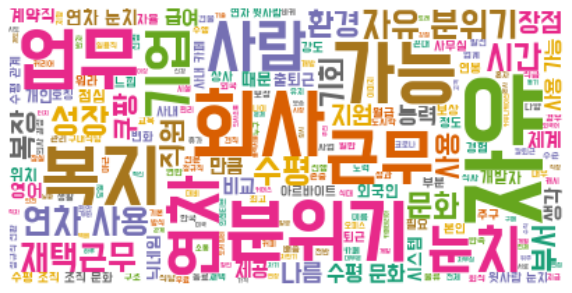

In [52]:
wordcloud.recolor(color_func=color_func, random_state=3)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [53]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(font_path='./BMDOHYEON_ttf.ttf', background_color='white').generate(coupang_bad_str)

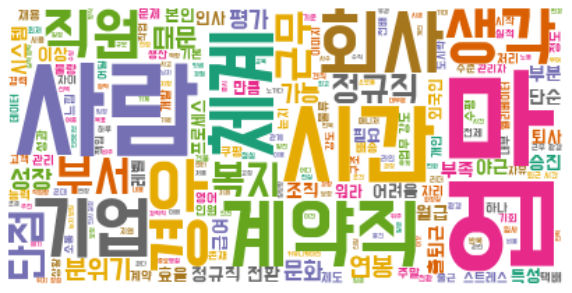

In [54]:
wordcloud.recolor(color_func=color_func, random_state=3)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()